# Explore GRS images

## Load python libraries

In [1]:

import glob
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray  # activate the rio accessor
from shapely.geometry import box
import datetime as dt

import hvplot.xarray
import pyproj as ppj

#import cartopy
import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import locale
#locale.setlocale(locale.LC_ALL, 'en_US.utf8')
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.use('TkAgg')


plt.rcParams.update({'font.family': 'Times New Roman',
                     'font.size': 16, 'axes.labelsize': 18,

                     })

rc = {"font.family" : "serif",
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

import panel as pn

import grs
import grstbx
from grstbx import visual

from aeronet_visu import data_loading as dl

u = grstbx.utils
opj = os.path.join


print(f'-grs: {grs.__version__}')
print(f'-grstbx: {grstbx.__version__}')

-grs: 2.1.7
-grstbx: 2.0.2


## AERONET-OC data base

In [2]:

info = pd.read_csv('/DATA/AERONET/info_aeronet_oc_v15_location.csv',index_col=0)#.to_xarray()
info

start_date    end_date  number   tile   Latitude  \
site                                                                    
Abu_Al_Bukhoosh      2015-07-01  2015-07-01       0  39RYJ  25.495000   
ARIAKE_TOWER         2018-04-19  2023-03-19    2000  52SFB  33.103617   
Bahia_Blanca         2020-01-23  2024-01-31    4281  20HPB -39.148000   
Banana_River         2022-06-16  2023-11-29    1279  17RNM  28.367000   
Bari_Waterfront      2015-07-01  2015-07-01       0  33TXF  41.116800   
Blyth_NOAH           2016-04-22  2017-09-19      32  30UWG  55.146399   
Casablanca_Platform  2019-04-02  2024-01-31   15652  31TCF  40.717000   
Chesapeake_Bay       2021-10-16  2024-01-27    8630  18SUJ  39.124000   
COVE_SEAPRISM        2015-11-16  2016-01-09     162  18SVF  36.900000   
Gageocho_Station     2015-07-01  2015-07-01       0  51SXT  33.941991   
Galata_Platform      2015-02-02  2023-12-19   15068  35TNH  43.044624   
Gloria               2015-01-01  2019-08-07    7606  35TPK  44.599970   
Gotland              2015-07-01  2015-07-01       0  34VCK  57.917000   
GOT_Seaprism         2015-01-01  2016-01-31      99  47PQL   9.286200   
Grizzly_Bay          2019-02-22  2019-12-09    1243  10SEH  38.108000   
Gustav_Dalen_Tower   2015-05-27  2023-09-23    8041  33VXF  58.594170   
HBOI                 2015-07-01  2015-07-01       0  17RNL  27.534000   
Helsinki_Lighthouse  2015-05-16  2019-09-06    1520  35VLG  59.948970   
Ieodo_Station        2016-10-06  2019-08-16      59  51SYR  32.122953   
Irbe_Lighthouse      2018-07-24  2023-11-26    4211  34VEK  57.750920   
KAUST_Campus         2015-07-01  2015-07-01       0  37QEE  22.304833   
Kemigawa_Offshore    2019-09-02  2023-09-14    1876  54SVE  35.611000   
Lake_Erie            2016-07-19  2023-10-02    1457  17TLG  41.825600   
Lake_Okeechobee      2018-08-09  2020-10-26    1510  17RNK  26.901700   
Lake_Okeechobee_N    2021-01-19  2022-01-05     562  17RNL  27.139000   
LISCO                2015-01-01  2024-01-05    3391  18TXL  40.954517   
Lucinda              2015-01-14  2023-11-30    3220  55KDV -18.519800   
MVCO                 2015-01-01  2023-08-23    2216  19TCF  41.325000   
Palgrunden           2015-05-18  2023-08-24    3587  33VUF  58.755333   
PLOCAN_Tower         2022-09-04  2024-01-31    2909  28RDS  28.041000   
RdP-EsNM             2023-03-04  2024-01-31    3958  21HVB -34.818000   
Sacramento_River     2021-05-18  2023-05-07     111  10SEH  38.050000   
San_Marco_Platform   2020-10-06  2024-01-31    6111  37MFS  -2.942000   
Section-7_Platform   2019-08-27  2024-01-31   16970  35TPK  44.546000   
Socheongcho          2015-10-12  2024-01-05    2245  51SXB  37.423133   
South_Greenbay       2018-07-06  2023-10-02     576  16TDQ  44.596330   
Thornton_C-power     2015-04-09  2023-12-26    1427  31UDT  51.532500   
USC_SEAPRISM         2015-01-14  2024-01-31    5821  11SLT  33.563710   
USC_SEAPRISM_2       2015-08-28  2019-09-23    1354  11SLT  33.563710   
Venise               2015-01-01  2023-03-12    6458  32TQR  45.313900   
WaveCIS_Site_CSI_6   2015-01-06  2023-12-11    3484  15RYN  28.866667   
Zeebrugge-MOW1       2015-01-04  2022-05-09     735  31UES  51.362000   

                      Longitude  
site                             
Abu_Al_Bukhoosh       53.145833  
ARIAKE_TOWER         130.271950  
Bahia_Blanca         -61.722000  
Banana_River         -80.633000  
Bari_Waterfront       16.893400  
Blyth_NOAH            -1.420859  
Casablanca_Platform    1.358000  
Chesapeake_Bay       -76.359000  
COVE_SEAPRISM        -75.710000  
Gageocho_Station     124.592912  
Galata_Platform       28.193190  
Gloria                29.359670  
Gotland               18.950000  
GOT_Seaprism         101.412300  
Grizzly_Bay         -122.056000  
Gustav_Dalen_Tower    17.466830  
HBOI                 -80.357000  
Helsinki_Lighthouse   24.926360  
Ieodo_Station        125.182447  
Irbe_Lighthouse       21.722970  
KAUST_Campus          39.102833  
Kemigawa_Offshore    140.0

In [3]:
site='RdP-EsNM' #	'Venise'#'Banana_River' #

info_ = info.loc[site]
tile =  info_.tile
clon,clat = info_.Longitude,info_.Latitude
print(tile,clon,clat)

hyp_aeronet_oc = xr.open_mfdataset('/DATA/AERONET/OCv3_invRrs/data/'+site+'_OCv3_lev15/*.nc').load()
hyp_aeronet_oc
aeronet_oc = xr.open_mfdataset('/DATA/AERONET/netcdf/OCv3/'+site+'*.nc').load()
aeronet_oc

21HVB -57.8959 -34.818


<xarray.Dataset> Size: 14MB
Dimensions:                       (time: 5371, wl: 13)
Coordinates:
  * time                          (time) datetime64[ns] 43kB 2023-03-04T10:40...
  * wl                            (wl) float64 104B 400.0 412.0 ... 681.0 709.0
Data variables: (12/45)
    Aerosol_Optical_Depth         (time, wl) float64 559kB 0.4495 ... 0.04182
    wavelength                    (time, wl) float64 559kB 0.3999 ... 0.7086
    Li_mean                       (time, wl) float64 559kB 3.211 3.698 ... 1.155
    Li_stddev                     (time, wl) float64 559kB 0.000323 ... 0.008586
    Lt_mean                       (time, wl) float64 559kB 0.157 ... 2.356
    Lt_min_rel                    (time, wl) float64 559kB 0.1368 ... 2.221
    ...                            ...
    year                          (time) int64 43kB 2023 2023 2023 ... 2024 2024
    season                        (time) <U3 64kB 'MAM' 'MAM' ... 'JJA' 'JJA'
    Rrs_Lw                        (time, wl) float64 559kB 0.0002811 ... 0.0156
    Rrs_Lwn                       (time, wl) float64 559kB 0.004749 ... 0.02502
    Rrs_Lwn_IOP                   (time, wl) float64 559kB 0.004036 ... 0.02088
    Rrs_Lwn_fQ                    (time, wl) float64 559kB 0.003869 ... 0.02102

In [4]:
hyp_aeronet_oc

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 5209, wl: 200)
Coordinates:
  * time     (time) datetime64[ns] 42kB 2023-03-04T10:40:40 ... 2024-08-28T17...
  * wl       (wl) float64 2kB 350.0 353.8 357.5 ... 1.092e+03 1.096e+03 1.1e+03
Data variables:
    Rrs      (time, wl) float64 8MB nan nan nan ... 0.0007156 0.0006642
Attributes:
    description:  InvRrs generated hyperspectral Rrs from multispectral AERON...

## Create datacube

In [5]:
rootdir ='/data/satellite/Sentinel-2/subset/L2A/'
dcdir = '/data/satellite/Sentinel-2/subset/datacube/'

suffix='_matchup'
start_year,end_year=2018,2024

In [6]:
# subset from center location and width/height

height,width=500,500

ust = grstbx.SpatioTemp()
box = ust.wktbox(clon, clat, width=width, height=height, ellps='WGS84')
bbox = gpd.GeoSeries.from_wkt([box]).set_crs(epsg=4326)

In [7]:
pattern='*'
datadir = opj(rootdir, tile, '*', '*', '*', pattern)#,'*[0-9].nc')
list_files = glob.glob(datadir)
list_files
file_labels=['satellite','level','time','baseline','orbit','tile','processing_time']
indexes = ['time','satellite','tile','level','baseline','orbit','processing_time']
basenames = pd.Series([os.path.basename(p) for p in list_files])  # ,columns=['basename']) #basenames
df = basenames.str.split('_', expand=True)
df.columns=file_labels
df['path']=list_files
df['time'] = pd.to_datetime(df['time'])
df=df.set_index(indexes).sort_index(level=0)


In [8]:
start_date='2018-01-01'
end_date='2024-12-31'
files = df[start_date:end_date].values.ravel()
dc_path=opj(dcdir,tile+f'_{start_date}_{end_date}'+suffix+'.nc')
if not os.path.exists(dc_path):
    dc = grstbx.L2grs(files)
    dc.get_l2a_datacube(subset=bbox)
    
    #dc.datacube.to_netcdf(dc_path)

In [9]:
#dcube=xr.open_dataset(dc_path,decode_coords='all')
#dcube

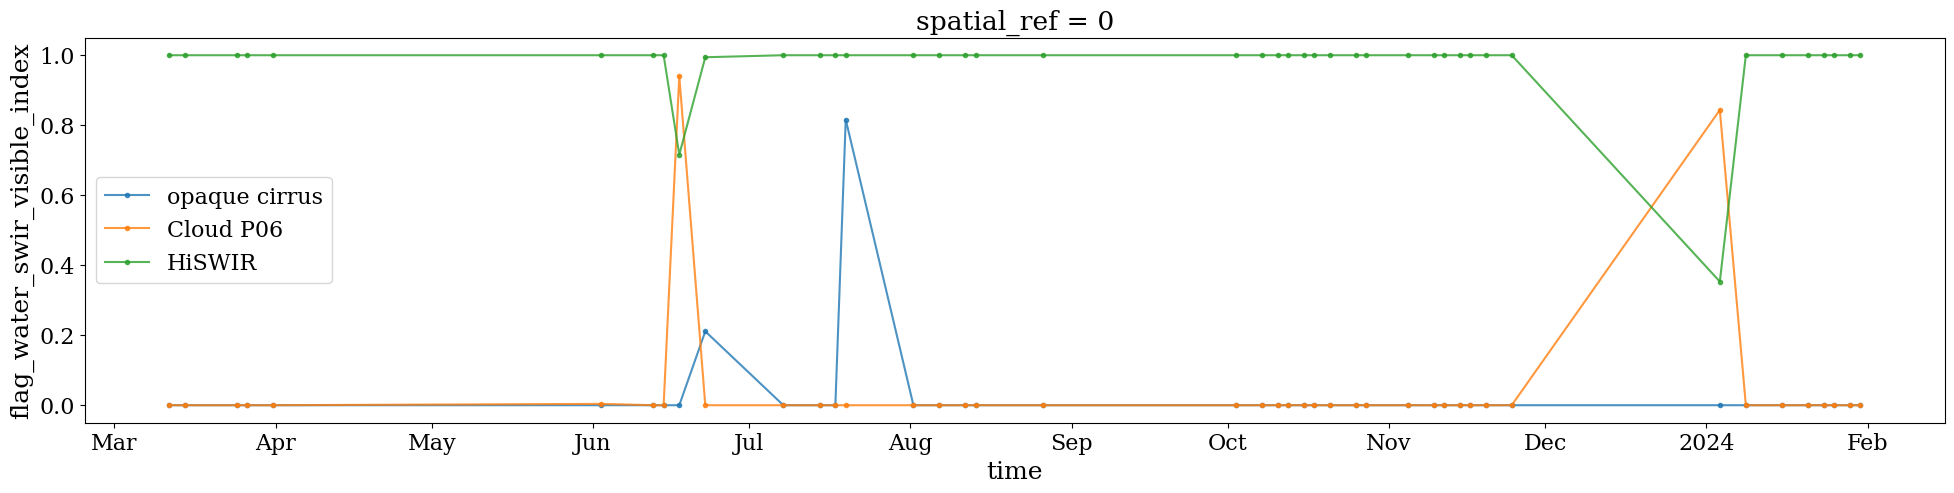

In [10]:
dcube=dc.datacube
alpha=0.8
plt.figure(figsize=(24,5))
dcube.flag_opac_cirrus.plot(marker="o",ms=3,alpha=alpha,label='opaque cirrus')
dcube.flag_cloud_p06.plot(marker="o",ms=3,alpha=alpha,label='Cloud P06')
dcube.flag_water_swir_visible_index.plot(marker="o",ms=3,alpha=alpha,label='HiSWIR')
plt.legend()

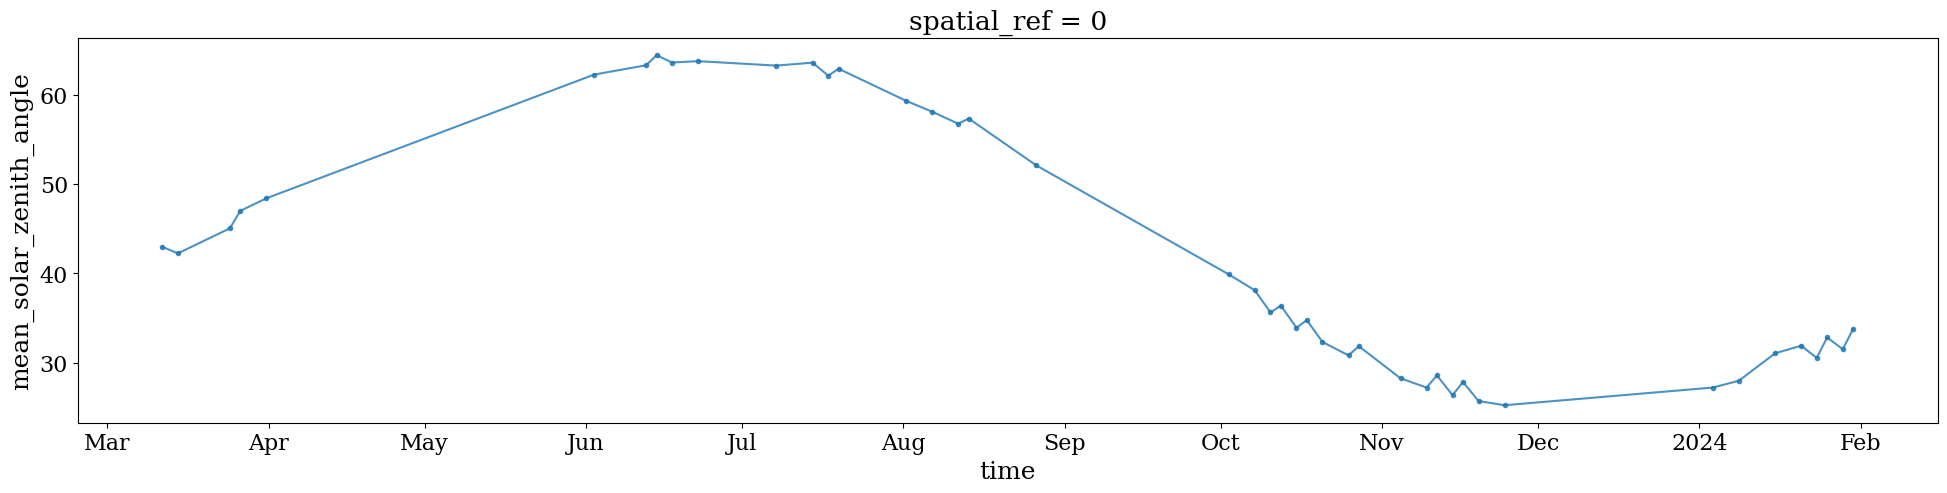

In [11]:
plt.figure(figsize=(24,5))
#dc.datacube.mean_solar_azimuth.plot()
dcube.mean_solar_zenith_angle.plot(marker="o",ms=3,alpha=alpha,label='SZA (deg)')



/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


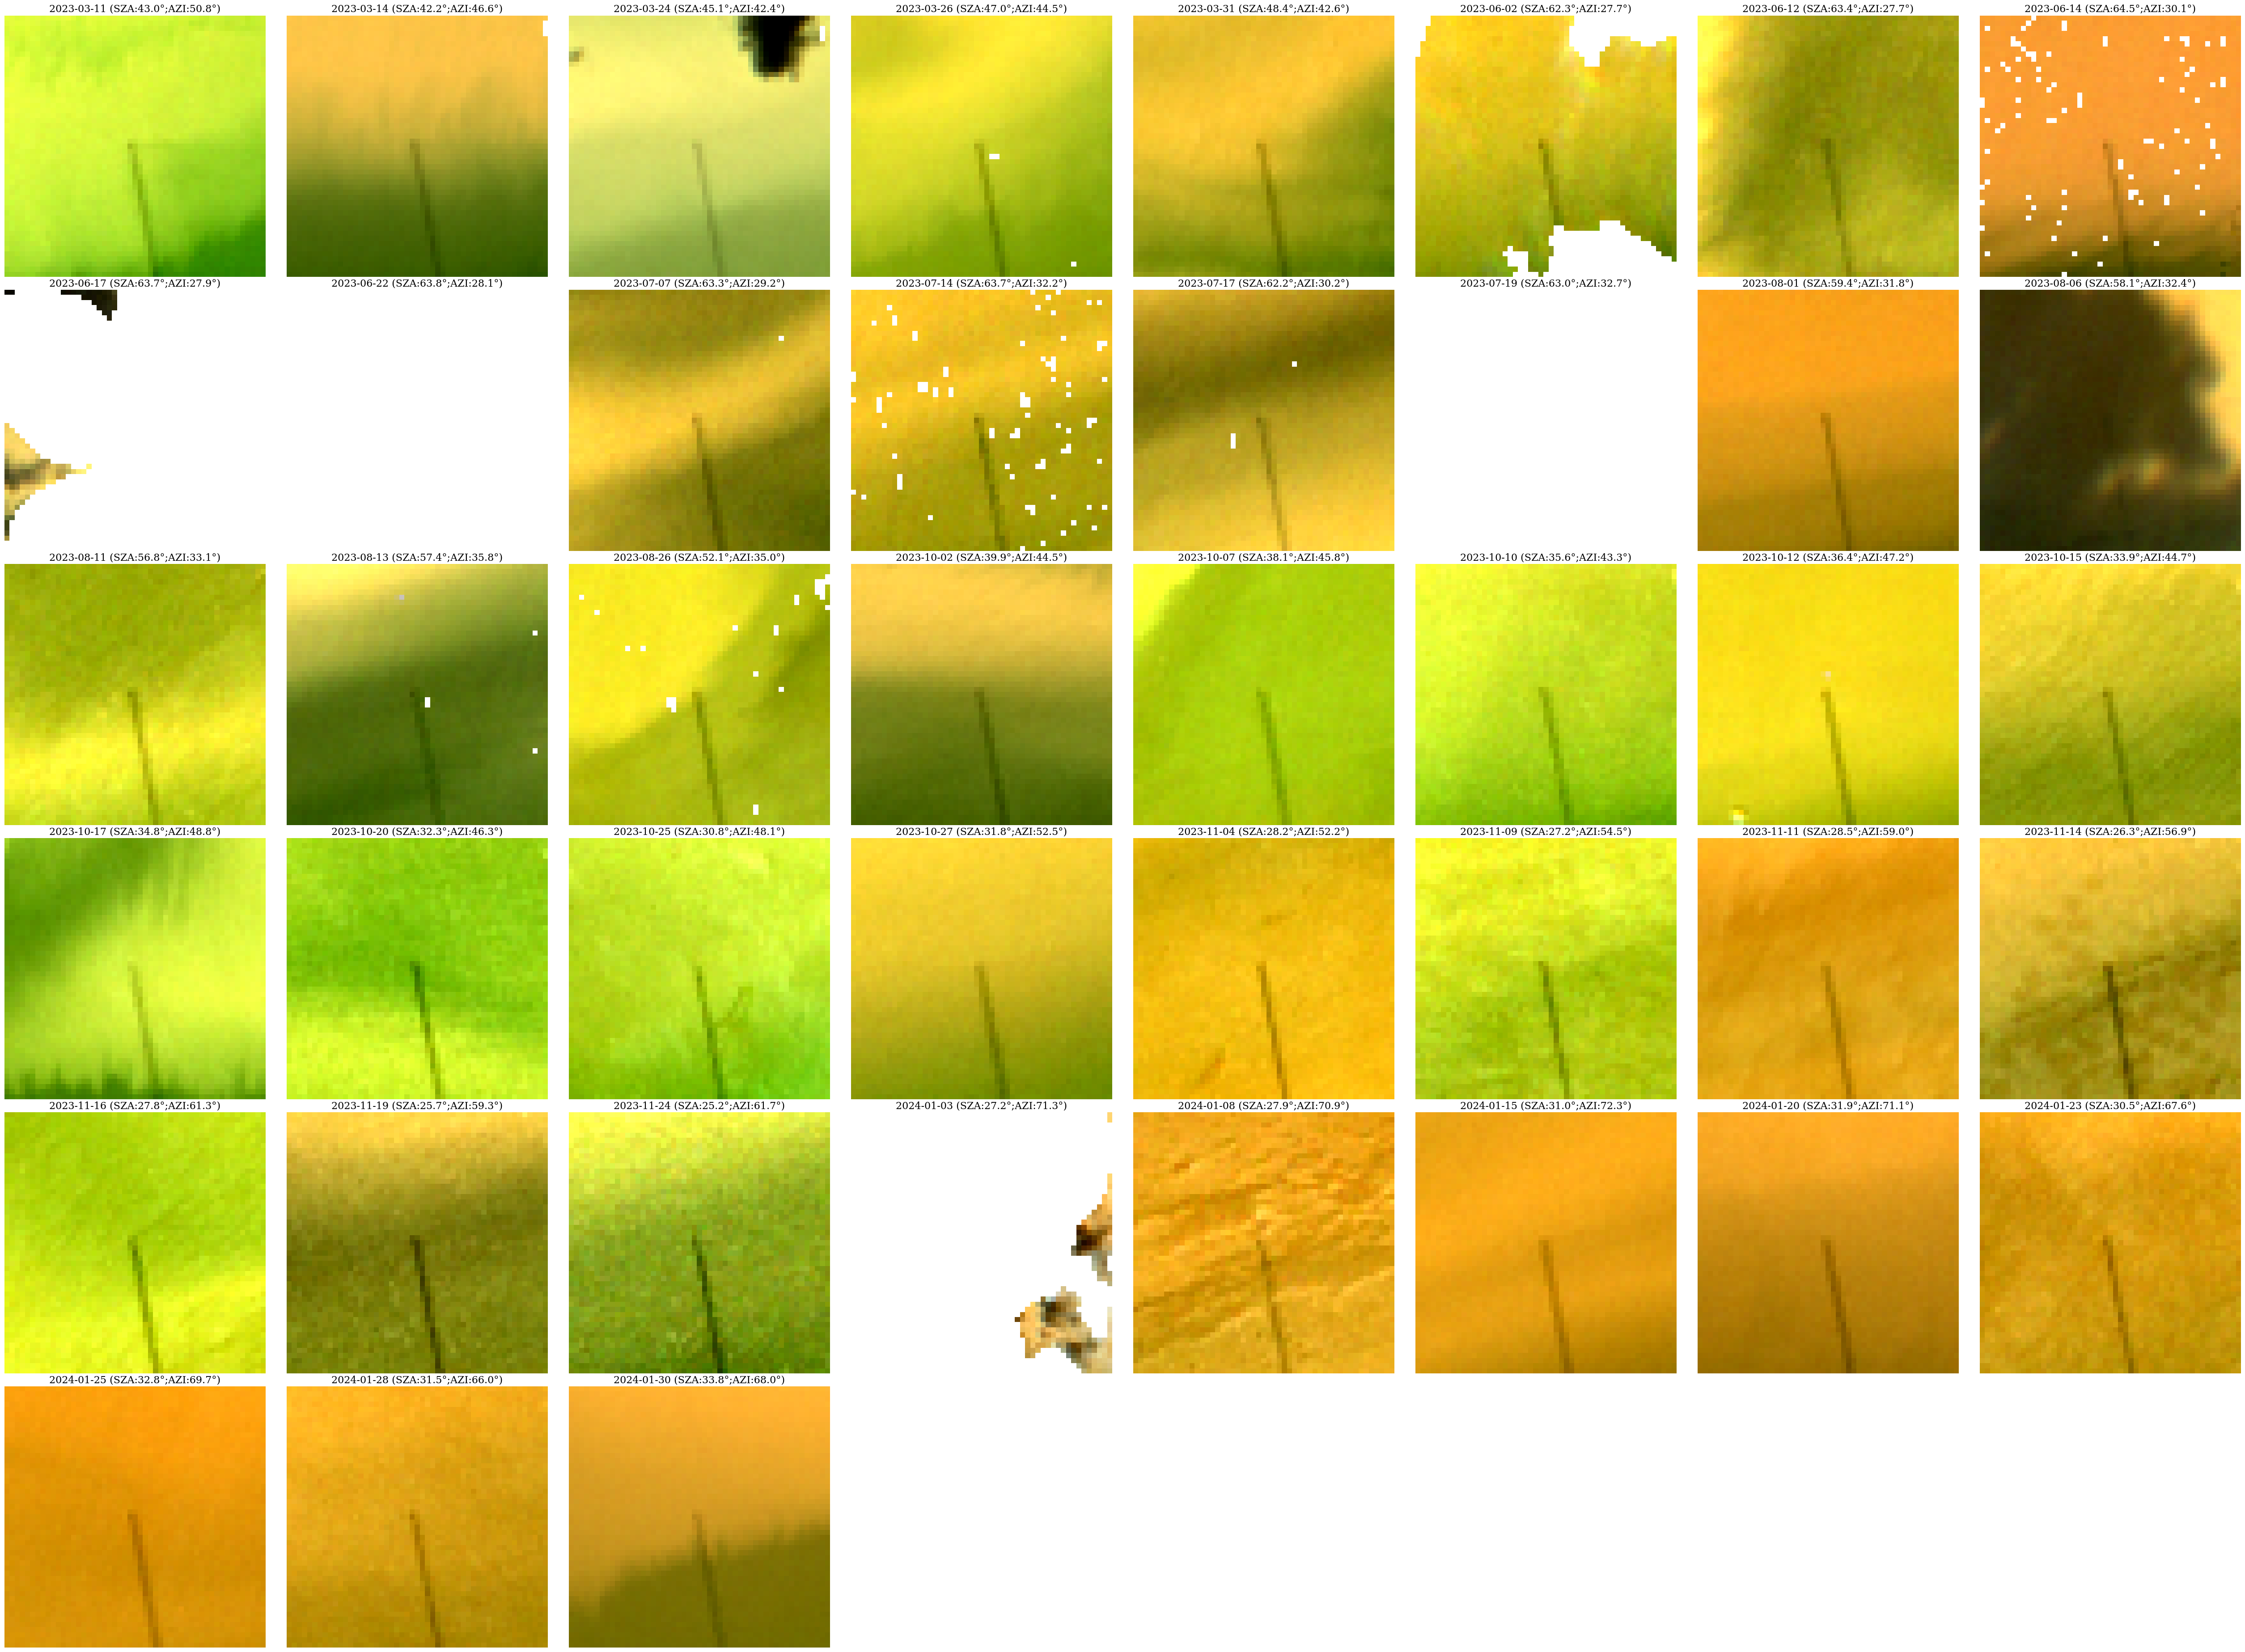

In [12]:
#dcube = dc.datacube

ncols=8


str_epsg = str(dcube.rio.crs)
zone = str_epsg[-2:]
is_south = str_epsg[2] == 7
proj = ccrs.UTM(zone, is_south)
alpha=0.5
dates = dcube.time

Ndates = len(dates)
ncols=np.min([ncols,Ndates])
nrows=int(np.ceil(Ndates/ncols))    

fig,axs = plt.subplots(nrows,ncols,figsize=(ncols*7,7*nrows+2.5),subplot_kw={'projection': proj}) 
fig.subplots_adjust(bottom=0.08, top=0.9, left=0.086, right=0.98,
                    hspace=0.05, wspace=0.07,)
if (ncols == 1) & (nrows == 1):
    axs = np.array([axs])
axs=axs.ravel()
[axi.set_axis_off() for axi in axs]

dem = dcube.dem
for ii,date in enumerate(dates):
    raster = dcube.sel(time=date)
    if 'time' in raster.dims:
        raster=raster.mean('time')
    azi =float(raster.mean_solar_azimuth)
    sza=float(raster.mean_solar_zenith_angle)
  
    date_ = date.dt.strftime('%Y-%m-%d').values
    #print(date_)
    #dem_attrs = grstbx.Dem.compute_dem_attributes(dem,sza,azi)
    #dem_attrs.shaded.plot.imshow(ax=axs[ii],robust=True,cmap=plt.cm.Greys_r,vmax=0.75,add_colorbar=False)#,cbar_kwargs={'shrink':0.4})
    
    raster.Rrs.sel(wl=[665,560,490]).where(raster.mask==0).plot.imshow(ax=axs[ii],rgb='wl', robust=True)
   
    axs[ii].set_title(date_+' (SZA:{:.1f}°;AZI:{:.1f}°)'.format(sza,azi),fontsize=16)


In [37]:
#v=visual.ViewSpectral(dcube.Rrs.drop_vars('central_wavelength'),reproject=True)
#v.minmax=[0,0.1]
#v.visu()

In [38]:
#geom_ = v.get_geom(v.aoi_stream,crs=dcube.rio.crs)

#Rrs_clipped = dcube.Rrs.sel(wl=slice(400,1000)).where(dcube.mask==0).rio.clip(geom_.geometry.values)

In [13]:
dcube=dcube.drop_duplicates('time')
Rrs_clipped = dcube.Rrs.sel(wl=slice(400,1000)).where(dcube.mask==0)

In [14]:
stacked = Rrs_clipped.sel(wl=slice(400,1000)).dropna('time',thresh=0).stack(gridcell=["y", "x"]).dropna('gridcell',thresh=0).compute()
Npix_tot = len(stacked.gridcell)
group_coord ='wl'
stat_coord='gridcell'
stats = xr.Dataset({'median':stacked.groupby(group_coord).median(stat_coord)})
stats['Rrs_q25'] = stacked.groupby(group_coord).quantile(0.25,dim=stat_coord)
stats['Rrs_q75'] = stacked.groupby(group_coord).quantile(0.75,dim=stat_coord)
stats['Rrs_min'] = stacked.groupby(group_coord).min(stat_coord)
stats['Rrs_max'] = stacked.groupby(group_coord).max(stat_coord)
stats['Rrs_mean'] = stacked.groupby(group_coord).mean(stat_coord)
stats['Rrs_std'] = stacked.groupby(group_coord).std(stat_coord)
stats['sza'] = dcube.sza.mean('x').mean('y')
stats['aot550'] = dcube.aot550.mean('x').mean('y')
stats['pix_num'] = stacked.count(stat_coord)
stats['rel_pix_num'] =  stats['pix_num'] / Npix_tot

/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/

In [15]:
group

NameError: name 'group' is not defined

In [ ]:
delta_time =  np.timedelta64(30, 'm')
time_ = stats.isel(time=0).time
hyp_aeronet_oc.sel(time=slice(time_-delta_time,time_+delta_time))

/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/harmel/anaconda3/envs/py12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


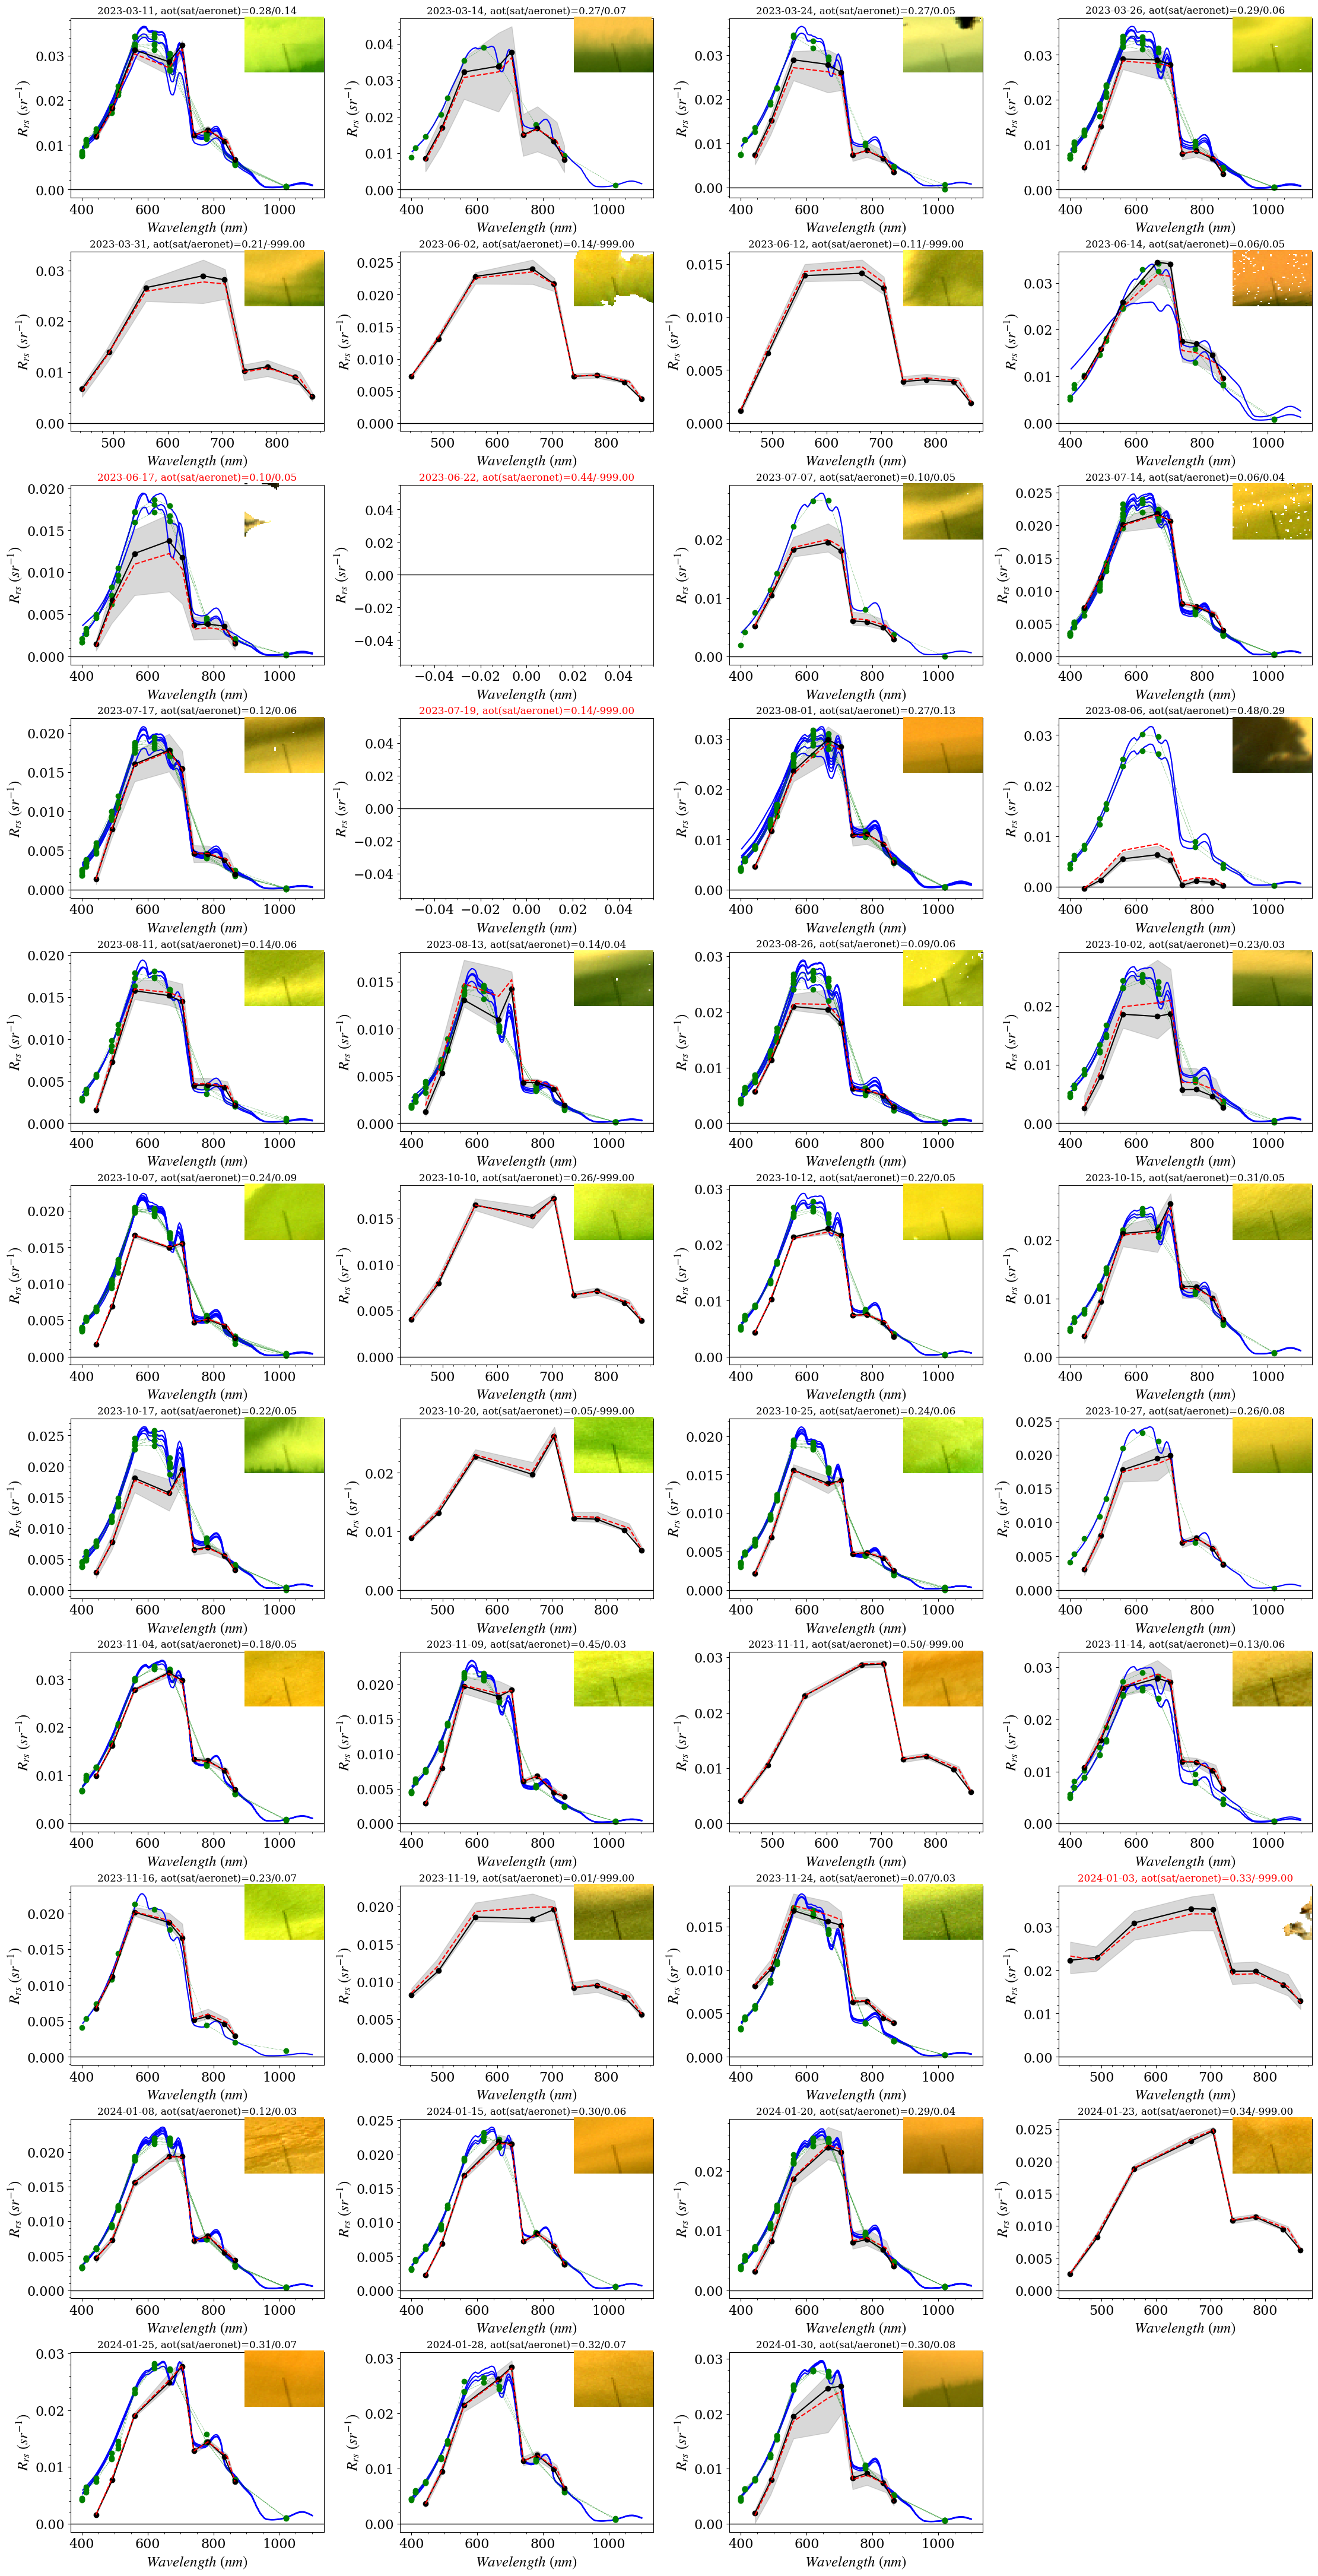

In [16]:
delta_time =  np.timedelta64(30, 'm')
wl_true = [ 442.69104,  492.72842,  559.85376,  664.6208 ,  704.12225,
        740.4838 ,  782.751  ,  832.789  ,  864.7106 ]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
num_items = len(stats.time)
col_wrap=4
rows=int(np.ceil(num_items/col_wrap))
bands=[3,2,1]

fig, axs = plt.subplots(nrows=rows,ncols=col_wrap, sharex=False, figsize=(col_wrap*6+3, rows*5))#,sharey=True
fig.subplots_adjust(hspace=0.3,wspace=0.3)
axs_ = axs.ravel()
[axi.set_axis_off() for axi in axs_]
for iax,(time_,group) in enumerate(stats.groupby('time')): 
    group=group.squeeze()
    if iax > 1000:
        break
    color='black'
    if group['rel_pix_num'].isel(wl=2).squeeze()<0.5:
        color='red'
    
    date_= str(group.time.dt.strftime('%Y-%m-%d').values)
    
    axs_[iax].set_axis_on()
    axs_[iax].minorticks_on()
    date = group.time.dt.date.values
    #spm = float(insitu_data.sel(time=date,method='nearest').spm)
    axins = inset_axes(axs_[iax], width="25%", height="25%",
                   bbox_to_anchor=(.66, .66, 1.25, 1.25),
                   bbox_transform=axs_[iax].transAxes, loc=3)
    try:
        hyp_aeronet_oc.sel(time=slice(time_-delta_time,time_+delta_time)).Rrs.plot(hue='time',color='blue',ax=axs_[iax],add_legend=False)
        
        ds_ = aeronet_oc.sel(time=slice(time_-delta_time,time_+delta_time))
        aot_aeronet = ds_.Aerosol_Optical_Depth.interp(wl=550).mean().values
        ds_['Rrs_Lwn'].plot(hue='time',lw=0.5,ls=':',color='green',marker='o',ax=axs_[iax],add_legend=False) 
        #ds_['Rrs_Lwn_fQ'].plot(hue='time',lw=0.5,ls=':',color='violet',marker='o',ax=axs_[iax],add_legend=False) 
        #ds_['Rrs_Lwn_IOP'].plot(hue='time',lw=0.5,ls=':',color='blue',marker='o',ax=axs_[iax],add_legend=False) 
    except:
        aot_aeronet = -999
    Rrs_clipped.sel(time=time_).isel(wl=bands).plot.imshow(robust=True,ax=axins)
    axins.set_title('')
    axins.set_axis_off()
    axs_[iax].axhline(y=0,color='k',lw=1)
    axs_[iax].plot(wl_true,group['median'],c='k',marker='o')
    axs_[iax].plot(group.wl,group['Rrs_mean'],c='red',ls='--')
    axs_[iax].fill_between(group.wl, group['Rrs_q25'], group['Rrs_q75'],alpha=0.3,color='grey')
    axs_[iax].set_title(str(date)+', aot(sat/aeronet)={:.2f}/{:.2f}'.format(group['aot550'].values,aot_aeronet),color=color,fontsize=12)#+', 
    axs_[iax].set_xlabel(r'$Wavelength\ (nm)$')
    axs_[iax].set_ylabel(r'$R_{rs}\ (sr^{-1})$')
plt.show()

In [17]:
good_dates = stats.where(stats.rel_pix_num>0.2,drop=True).time.values

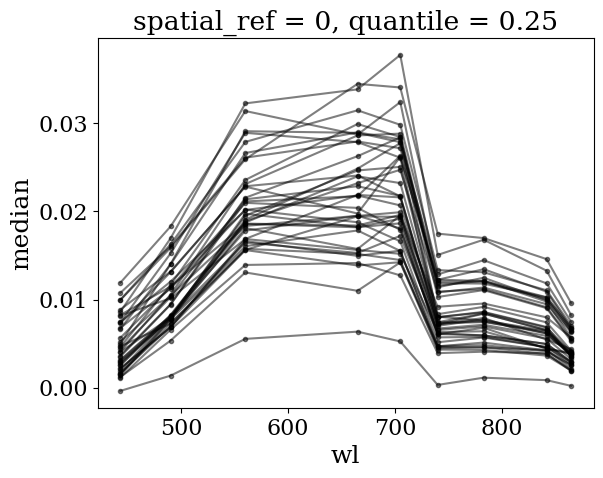

In [18]:
stats.sel(time=good_dates)['median'].plot(hue='time',marker='o',ms=3,color='k',alpha=0.5,add_legend=False)
plt.show()

In [19]:
stats.where(stats.rel_pix_num>0.2,drop=True)

<xarray.Dataset> Size: 31kB
Dimensions:      (time: 39, wl: 9)
Coordinates:
  * time         (time) datetime64[ns] 312B 2023-03-11T13:38:31 ... 2024-01-3...
  * wl           (wl) int64 72B 443 490 560 665 705 740 783 842 865
    spatial_ref  int64 8B 0
    quantile     float64 8B 0.25
Data variables:
    median       (time, wl) float64 3kB 0.0119 0.01828 ... 0.00741 0.00419
    Rrs_q25      (time, wl) float64 3kB 0.01125 0.01725 ... 0.00569 0.00329
    Rrs_q75      (time, wl) float64 3kB 0.01227 0.01865 ... 0.00818 0.00472
    Rrs_min      (time, wl) float64 3kB 0.00746 0.01246 ... 0.00439 0.00126
    Rrs_max      (time, wl) float64 3kB 0.01284 0.01961 ... 0.00963 0.00605
    Rrs_mean     (time, wl) float64 3kB 0.01157 0.01774 ... 0.007146 0.004067
    Rrs_std      (time, wl) float64 3kB 0.001052 0.001427 ... 0.001284 0.0008345
    sza          (time, wl) float64 3kB 43.22 43.22 43.22 ... 34.06 34.06 34.06
    aot550       (time, wl) float64 3kB 0.281 0.281 0.281 ... 0.303 0.303 0.303
    pix_num      (time, wl) float64 3kB 2.601e+03 2.601e+03 ... 2.601e+03
    rel_pix_num  (time, wl) float64 3kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0

In [20]:
sat_time = stats.where(stats.rel_pix_num>0.2,drop=True).time#.reset_coords(drop=True)
sat_time.name = 'sat_time'

insitu_data = hyp_aeronet_oc #ds
insitu_time = insitu_data.time
insitu_time.name = 'insitu_time'


In [21]:
matchup_time = pd.merge_asof(
    sat_time.to_dataframe(),
    insitu_time.to_dataframe(),
    tolerance=pd.Timedelta("2d"),left_index=True, right_index=True).dropna()
matchup_time

spatial_ref  quantile            sat_time  \
time                                                             
2023-03-11 13:38:31            0      0.25 2023-03-11 13:38:31   
2023-03-14 13:47:01            0      0.25 2023-03-14 13:47:01   
2023-03-24 13:47:01            0      0.25 2023-03-24 13:47:01   
2023-03-26 13:38:39            0      0.25 2023-03-26 13:38:39   
2023-03-31 13:38:31            0      0.25 2023-03-31 13:38:31   
2023-06-02 13:47:11            0      0.25 2023-06-02 13:47:11   
2023-06-12 13:47:11            0      0.25 2023-06-12 13:47:11   
2023-06-14 13:38:39            0      0.25 2023-06-14 13:38:39   
2023-07-07 13:47:09            0      0.25 2023-07-07 13:47:09   
2023-07-14 13:38:39            0      0.25 2023-07-14 13:38:39   
2023-07-17 13:47:09            0      0.25 2023-07-17 13:47:09   
2023-08-01 13:47:11            0      0.25 2023-08-01 13:47:11   
2023-08-06 13:47:09            0      0.25 2023-08-06 13:47:09   
2023-08-11 13:47:11            0      0.25 2023-08-11 13:47:11   
2023-08-13 13:38:39            0      0.25 2023-08-13 13:38:39   
2023-08-26 13:47:09            0      0.25 2023-08-26 13:47:09   
2023-10-02 13:38:39            0      0.25 2023-10-02 13:38:39   
2023-10-07 13:38:31            0      0.25 2023-10-07 13:38:31   
2023-10-10 13:47:01            0      0.25 2023-10-10 13:47:01   
2023-10-12 13:38:39            0      0.25 2023-10-12 13:38:39   
2023-10-15 13:47:09            0      0.25 2023-10-15 13:47:09   
2023-10-17 13:38:31            0      0.25 2023-10-17 13:38:31   
2023-10-25 13:47:09            0      0.25 2023-10-25 13:47:09   
2023-10-27 13:38:31            0      0.25 2023-10-27 13:38:31   
2023-11-04 13:47:09            0      0.25 2023-11-04 13:47:09   
2023-11-09 13:47:01            0      0.25 2023-11-09 13:47:01   
2023-11-11 13:38:39            0      0.25 2023-11-11 13:38:39   
2023-11-14 13:47:09            0      0.25 2023-11-14 13:47:09   
2023-11-16 13:38:31            0      0.25 2023-11-16 13:38:31   
2023-11-19 13:47:01            0      0.25 2023-11-19 13:47:01   
2023-11-24 13:46:59            0      0.25 2023-11-24 13:46:59   
2024-01-08 13:47:01            0      0.25 2024-01-08 13:47:01   
2024-01-15 13:38:31            0      0.25 2024-01-15 13:38:31   
2024-01-20 13:38:29            0      0.25 2024-01-20 13:38:29   
2024-01-23 13:46:59            0      0.25 2024-01-23 13:46:59   
2024-01-25 13:38:31            0      0.25 2024-01-25 13:38:31   
2024-01-28 13:47:01            0      0.25 2024-01-28 13:47:01   
2024-01-30 13:38:29            0      0.25 2024-01-30 13:38:29   

                            insitu_time  
time                                     
2023-03-11 13:38:31 2023-03-11 13:38:25  
2023-03-14 13:47:01 2023-03-13 20:25:44  
2023-03-24 13:47:01 2023-03-24 13:26:12  
2023-03-26 13:38:39 2023-03-26 13:31:22  
2023-03-31 13:38:31 2023-03-29 16:40:19  
2023-06-02 13:47:11 2023-06-01 19:32:15  
2023-06-12 13:47:11 2023-06-11 19:40:40  
2023-06-14 13:38:39 2023-06-14 13:30:39  
2023-07-07 13:47:09 2023-07-06 19:47:25  
2023-07-14 13:38:39 2023-07-14 13:35:35  
2023-07-17 13:47:09 2023-07-17 13:44:35  
2023-08-01 13:47:11 2023-08-01 13:43:00  
2023-08-06 13:47:09 2023-08-06 13:26:45  
2023-08-11 13:47:11 2023-08-11 13:42:58  
2023-08-13 13:38:39 2023-08-13 13:32:53  
2023-08-26 13:47:09 2023-08-26 13:41:22  
2023-10-02 13:38:39 2023-10-02 13:31:49  
2023-10-07 13:38:31 2023-10-07 13:37:07  
2023-10-10 13:47:01 2023-10-09 20:34:07  
2023-10-12 13:38:39 2023-10-12 13:21:59  
2023-10-15 13:47:09 2023-10-15 13:31:34  
2023-10-17 13:38:31 2023-10-17 13:31:55  
2023-10-25 13:47:09 2023-10-25 13:46:49  
2023-10-27 13:38:31 2023-10-27 13:23:07  
2023-11-04 13:47:09 2023-11-04 13:27:58  
2023-11-09 13:47:01 2023-11-09 13:25:57  
2023-11-11 13:38:39 2023-11-09 19:22:59  
2023-11-14 13:47:09 2023-11-14 13:23:57  
2023-11-16 13:38:31 2023-11-16 13:24:54  
2023-11-19 13:47:01 2023-11-19 12:21:47  
2023-11-24 13:46:59 2023-11-24 13:16

In [22]:
stats.time.dt.floor('1D')

<xarray.DataArray 'floor' (time: 43)> Size: 344B
array(['2023-03-11T00:00:00.000000000', '2023-03-14T00:00:00.000000000',
       '2023-03-24T00:00:00.000000000', '2023-03-26T00:00:00.000000000',
       '2023-03-31T00:00:00.000000000', '2023-06-02T00:00:00.000000000',
       '2023-06-12T00:00:00.000000000', '2023-06-14T00:00:00.000000000',
       '2023-06-17T00:00:00.000000000', '2023-06-22T00:00:00.000000000',
       '2023-07-07T00:00:00.000000000', '2023-07-14T00:00:00.000000000',
       '2023-07-17T00:00:00.000000000', '2023-07-19T00:00:00.000000000',
       '2023-08-01T00:00:00.000000000', '2023-08-06T00:00:00.000000000',
       '2023-08-11T00:00:00.000000000', '2023-08-13T00:00:00.000000000',
       '2023-08-26T00:00:00.000000000', '2023-10-02T00:00:00.000000000',
       '2023-10-07T00:00:00.000000000', '2023-10-10T00:00:00.000000000',
       '2023-10-12T00:00:00.000000000', '2023-10-15T00:00:00.000000000',
       '2023-10-17T00:00:00.000000000', '2023-10-20T00:00:00.000000000',
       '2023-10-25T00:00:00.000000000', '2023-10-27T00:00:00.000000000',
       '2023-11-04T00:00:00.000000000', '2023-11-09T00:00:00.000000000',
       '2023-11-11T00:00:00.000000000', '2023-11-14T00:00:00.000000000',
       '2023-11-16T00:00:00.000000000', '2023-11-19T00:00:00.000000000',
       '2023-11-24T00:00:00.000000000', '2024-01-03T00:00:00.000000000',
       '2024-01-08T00:00:00.000000000', '2024-01-15T00:00:00.000000000',
       '2024-01-20T00:00:00.000000000', '2024-01-23T00:00:00.000000000',
       '2024-01-25T00:00:00.000000000', '2024-01-28T00:00:00.000000000',
       '2024-01-30T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 344B 2023-03-11T13:38:31 ... 2024-01-3...
    spatial_ref  int64 8B 0
    quantile     float64 8B 0.25

In [23]:

def get_daily(ds):
    ds['time'] = ds.time.dt.floor('1D')
    
    # group by 'date' using an average (mean)
    return ds.groupby('time').mean()
get_daily(stats.sel(time=matchup_time['sat_time'].values))

<xarray.Dataset> Size: 26kB
Dimensions:      (time: 38, wl: 9)
Coordinates:
  * wl           (wl) int64 72B 443 490 560 665 705 740 783 842 865
    spatial_ref  int64 8B 0
    quantile     float64 8B 0.25
  * time         (time) datetime64[ns] 304B 2023-03-11 2023-03-14 ... 2024-01-30
Data variables:
    median       (time, wl) float64 3kB 0.0119 0.01828 ... 0.00741 0.00419
    Rrs_q25      (time, wl) float64 3kB 0.01125 0.01725 ... 0.00569 0.00329
    Rrs_q75      (time, wl) float64 3kB 0.01227 0.01865 ... 0.00818 0.00472
    Rrs_min      (time, wl) float64 3kB 0.00746 0.01246 ... 0.00439 0.00126
    Rrs_max      (time, wl) float64 3kB 0.01284 0.01961 ... 0.00963 0.00605
    Rrs_mean     (time, wl) float64 3kB 0.01157 0.01774 ... 0.007146 0.004067
    Rrs_std      (time, wl) float64 3kB 0.001052 0.001427 ... 0.001284 0.0008345
    sza          (time) float64 304B 43.22 42.47 45.27 ... 33.11 31.79 34.06
    aot550       (time) float64 304B 0.281 0.2652 0.2713 ... 0.3103 0.3185 0.303
    pix_num      (time, wl) float64 3kB 2.601e+03 2.601e+03 ... 2.601e+03
    rel_pix_num  (time, wl) float64 3kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0

In [24]:
insitu_data#.interp(wl=xmatchup.wl)

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 5209, wl: 200)
Coordinates:
  * time     (time) datetime64[ns] 42kB 2023-03-04T10:40:40 ... 2024-08-28T17...
  * wl       (wl) float64 2kB 350.0 353.8 357.5 ... 1.092e+03 1.096e+03 1.1e+03
Data variables:
    Rrs      (time, wl) float64 8MB nan nan nan ... 0.0007156 0.0006642
Attributes:
    description:  InvRrs generated hyperspectral Rrs from multispectral AERON...

In [25]:
xmatchup = get_daily(stats.sel(time=matchup_time['sat_time'].values)) 
xmatchup

<xarray.Dataset> Size: 26kB
Dimensions:      (time: 38, wl: 9)
Coordinates:
  * wl           (wl) int64 72B 443 490 560 665 705 740 783 842 865
    spatial_ref  int64 8B 0
    quantile     float64 8B 0.25
  * time         (time) datetime64[ns] 304B 2023-03-11 2023-03-14 ... 2024-01-30
Data variables:
    median       (time, wl) float64 3kB 0.0119 0.01828 ... 0.00741 0.00419
    Rrs_q25      (time, wl) float64 3kB 0.01125 0.01725 ... 0.00569 0.00329
    Rrs_q75      (time, wl) float64 3kB 0.01227 0.01865 ... 0.00818 0.00472
    Rrs_min      (time, wl) float64 3kB 0.00746 0.01246 ... 0.00439 0.00126
    Rrs_max      (time, wl) float64 3kB 0.01284 0.01961 ... 0.00963 0.00605
    Rrs_mean     (time, wl) float64 3kB 0.01157 0.01774 ... 0.007146 0.004067
    Rrs_std      (time, wl) float64 3kB 0.001052 0.001427 ... 0.001284 0.0008345
    sza          (time) float64 304B 43.22 42.47 45.27 ... 33.11 31.79 34.06
    aot550       (time) float64 304B 0.281 0.2652 0.2713 ... 0.3103 0.3185 0.303
    pix_num      (time, wl) float64 3kB 2.601e+03 2.601e+03 ... 2.601e+03
    rel_pix_num  (time, wl) float64 3kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0

In [26]:
insitu_matchup = insitu_data.sel(time=matchup_time['insitu_time'].values).load().sortby('wl')
insitu_matchup = get_daily(insitu_matchup.interpolate_na(dim="wl").interp(wl=xmatchup.wl))
insitu_matchup

<xarray.Dataset> Size: 3kB
Dimensions:      (time: 37, wl: 9)
Coordinates:
  * wl           (wl) int64 72B 443 490 560 665 705 740 783 842 865
    spatial_ref  int64 8B 0
    quantile     float64 8B 0.25
  * time         (time) datetime64[ns] 296B 2023-03-11 2023-03-13 ... 2024-01-30
Data variables:
    Rrs          (time, wl) float64 3kB 0.01251 0.01859 ... 0.006673 0.005605
Attributes:
    description:  InvRrs generated hyperspectral Rrs from multispectral AERON...

In [27]:
matchup_data = xr.merge([xmatchup,insitu_matchup])#, join="override")
matchup_data

<xarray.Dataset> Size: 33kB
Dimensions:      (wl: 9, time: 44)
Coordinates:
  * wl           (wl) int64 72B 443 490 560 665 705 740 783 842 865
  * time         (time) datetime64[ns] 352B 2023-03-11 2023-03-13 ... 2024-01-30
    spatial_ref  int64 8B 0
    quantile     float64 8B 0.25
Data variables:
    median       (time, wl) float64 3kB 0.0119 0.01828 ... 0.00741 0.00419
    Rrs_q25      (time, wl) float64 3kB 0.01125 0.01725 ... 0.00569 0.00329
    Rrs_q75      (time, wl) float64 3kB 0.01227 0.01865 ... 0.00818 0.00472
    Rrs_min      (time, wl) float64 3kB 0.00746 0.01246 ... 0.00439 0.00126
    Rrs_max      (time, wl) float64 3kB 0.01284 0.01961 ... 0.00963 0.00605
    Rrs_mean     (time, wl) float64 3kB 0.01157 0.01774 ... 0.007146 0.004067
    Rrs_std      (time, wl) float64 3kB 0.001052 0.001427 ... 0.001284 0.0008345
    sza          (time) float64 352B 43.22 nan 42.47 45.27 ... 33.11 31.79 34.06
    aot550       (time) float64 352B 0.281 nan 0.2652 ... 0.3103 0.3185 0.303
    pix_num      (time, wl) float64 3kB 2.601e+03 2.601e+03 ... 2.601e+03
    rel_pix_num  (time, wl) float64 3kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    Rrs          (time, wl) float64 3kB 0.01251 0.01859 ... 0.006673 0.005605

In [28]:

import scipy as sp
from sklearn import linear_model, metrics
def add_stats(x, y, ax, label=False,fontsize=12):
    regr = sp.stats.linregress(x, y)

    # Prediction metrics
    rmse = np.sqrt(metrics.mean_squared_error(x, y))
    mape = metrics.mean_absolute_percentage_error(x, y)
    bias = np.mean(y - x)
    
    #Median symmetric accuracy (eps) (Eq. 8), medianBIAS (beta) Eq. 9 in Pahlevan et al. 2020
    abs_med_ratio=np.median(np.abs(np.log10(y)-np.log10(x)))
    med_ratio=np.median(np.log10(y)-np.log10(x))
    eps=(10**abs_med_ratio-1)
    beta=10**np.abs(med_ratio)
    
    N = len(x)
    stats = r'$y = %.2f x %+.4f$' % (regr.slope, regr.intercept) + \
            '\n$r = %.3f$' % (regr.rvalue) + \
            '\n$rmse = %.3f$' % (rmse) + \
            '\n$mape = %.3f$' % (mape) + \
            '\n$bias = %.4f$' % (bias) + \
            '\n$\\epsilon = %.3f$' % (eps) + \
            '\n$\\beta = %.3f$' % (beta) + \
            '\n$N = %i$' % (N)

    #print(stats)
    ax.axline(xy1=(0.01, regr.intercept + 0.01 * regr.slope), slope=regr.slope, ls='--', lw=1.5, c="gray")
    if label:
       # ax.text(0.02, 0.98, stats, fontsize=fontsize, verticalalignment='top', horizontalalignment='left',
       #         transform=ax.transAxes)
        ax.text(0.98, 0.01, stats, fontsize=fontsize, verticalalignment='bottom', horizontalalignment='right',
                    transform=ax.transAxes)
    return


In [43]:

import scipy as sp
from sklearn import linear_model, metrics
def add_stats(x, y, ax,
              label=False,
              fontsize=12,
              Nbands=0):
    regr = sp.stats.linregress(x, y)

    # Prediction metrics
    rmse = np.sqrt(metrics.mean_squared_error(x, y))
    mape = metrics.mean_absolute_percentage_error(x, y)
    bias = np.mean(y - x)
    
    #Median symmetric accuracy (eps) (Eq. 8), medianBIAS (beta) Eq. 9 in Pahlevan et al. 2020
    abs_med_ratio=np.median(np.abs(np.log10(y)-np.log10(x)))
    med_ratio=np.median(np.log10(y)-np.log10(x))
    eps=(10**abs_med_ratio-1)
    beta=10**np.abs(med_ratio)
    
    N = len(x)
    stats = r'$y = %.2f x %+.4f$' % (regr.slope, regr.intercept) + \
            '\n$r = %.3f$' % (regr.rvalue) + \
            '\n$rmse = %.4f$' % (rmse) + \
            '\n$mape = %.3f$' % (mape) + \
            '\n$bias = %.4f$' % (bias) + \
            '\n$\\epsilon = %.3f$' % (eps) + \
            '\n$\\beta = %.3f$' % (beta) 
    if Nbands > 0:
        stats+='\n$N = %i(%i)$' % (N,N/Nbands)
    else:
        stats+='\n$N = %i$' % (N)

    #print(stats)
    ax.axline(xy1=(0.01, regr.intercept + 0.01 * regr.slope), slope=regr.slope, ls='--', lw=1.5, c="gray")
    if label:
       # ax.text(0.02, 0.98, stats, fontsize=fontsize, verticalalignment='top', horizontalalignment='left',
       #         transform=ax.transAxes)
        ax.text(0.98, 0.01, stats, fontsize=fontsize, verticalalignment='bottom', horizontalalignment='right',
                    transform=ax.transAxes)
    return


In [ ]:
## remove outliers

In [33]:
matchup_data = matchup_data.drop_sel(time='2023-08-06')

In [34]:
matchup_data_.where(matchup_data_['median']<0.002,drop=True)

<xarray.Dataset> Size: 128B
Dimensions:      (time: 1)
Coordinates:
    wl           int64 8B 740
  * time         (time) datetime64[ns] 8B 2023-08-06
    spatial_ref  int64 8B 0
    quantile     float64 8B 0.25
Data variables:
    median       (time) float64 8B 0.00032
    Rrs_q25      (time) float64 8B -2e-05
    Rrs_q75      (time) float64 8B 0.00097
    Rrs_min      (time) float64 8B -0.0007
    Rrs_max      (time) float64 8B 0.00976
    Rrs_mean     (time) float64 8B 0.001081
    Rrs_std      (time) float64 8B 0.002112
    sza          (time) float64 8B 58.3
    aot550       (time) float64 8B 0.4802
    pix_num      (time) float64 8B 2.601e+03
    rel_pix_num  (time) float64 8B 1.0
    Rrs          (time) float64 8B 0.009599

<>:33: SyntaxWarning: invalid escape sequence '\ '
<>:33: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_409456/2597521619.py:33: SyntaxWarning: invalid escape sequence '\ '
  ax.set_title(r'$wl='+str(wl)+'\ nm$')


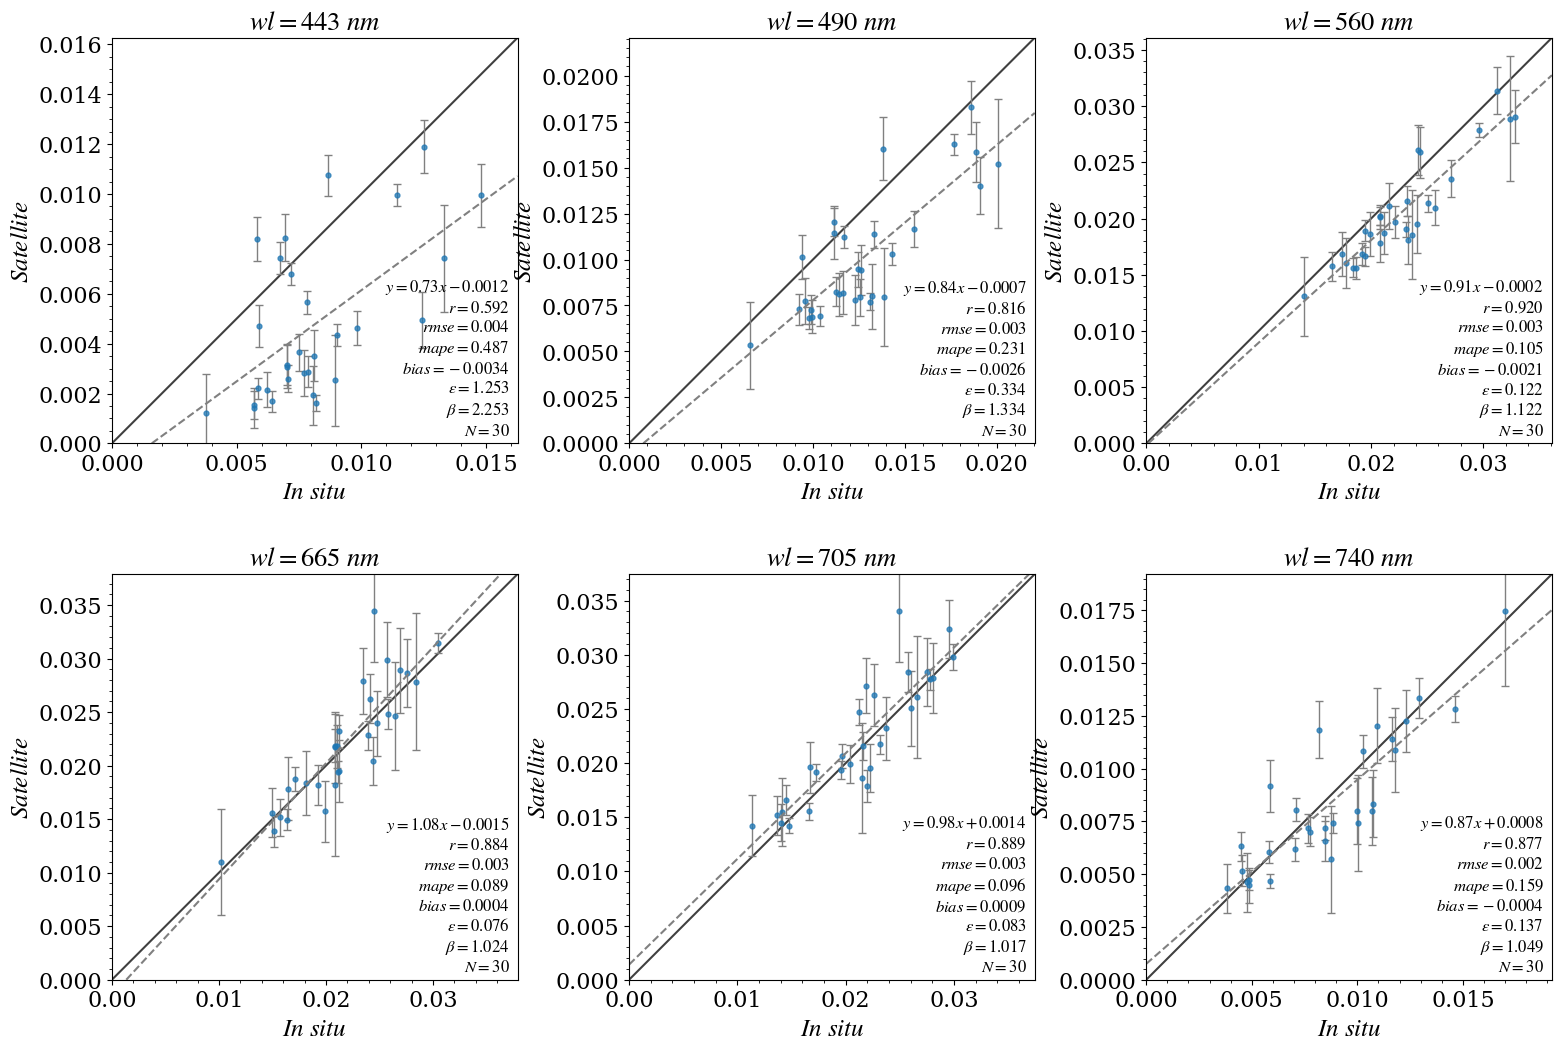

In [35]:
sat_var='median'
insitu_var= 'Rrs'
rows=2
cols=3
u = grstbx.utils
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*5+1, rows * 5+1.))  # ,sharey=True
fig.subplots_adjust(hspace=0.275, wspace=0.275,left=0.065, right=0.965,bottom=0.08, top=0.95)
axs=axs.ravel()
for ii, wl in enumerate(matchup_data.isel(wl=slice(0,6)).wl.values):
    ax=axs[ii]
    matchup_data_ = matchup_data.sel(wl=wl).dropna('time')
   
    x,y=matchup_data_[insitu_var].values.ravel(),matchup_data_[sat_var].values.ravel()
    
    all_values = [*x,*y]
    xmin,xmax=np.min([0,np.min(all_values)])*1.1,np.max(all_values)*1.1

  
    ax.plot(x,y,ls='',marker='o',ms=3.5,alpha=0.75,zorder=2)
    #im2 = matchup_.groupby('station').plot.scatter(x=insitu_var,y=sat_var,ax=ax)
    ax.errorbar(x,y,
    #            xerr=matchup[insitu_var.replace('mean','std')].values.ravel(),
                yerr=matchup_data_['Rrs_std'].values.ravel(),
                color='gray',fmt='none',lw=1, capsize=3,zorder=1)# ecolor=resdf.spm_norm, zorder=9)

    add_stats(x,y,ax,label=True)

    ax.set_xlim([xmin,xmax])
    ax.set_ylim([xmin,xmax])
    ax.minorticks_on()
    

    ax.set_title(r'$wl='+str(wl)+'\ nm$')
    ax.set_xlabel(r'$In\ situ\ $')
    ax.set_ylabel(r'$Satellite\ $')


for ax in axs.ravel():
    u.Plotting.set_layout(ax)

<>:33: SyntaxWarning: invalid escape sequence '\ '
<>:33: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_409456/2597521619.py:33: SyntaxWarning: invalid escape sequence '\ '
  ax.set_title(r'$wl='+str(wl)+'\ nm$')


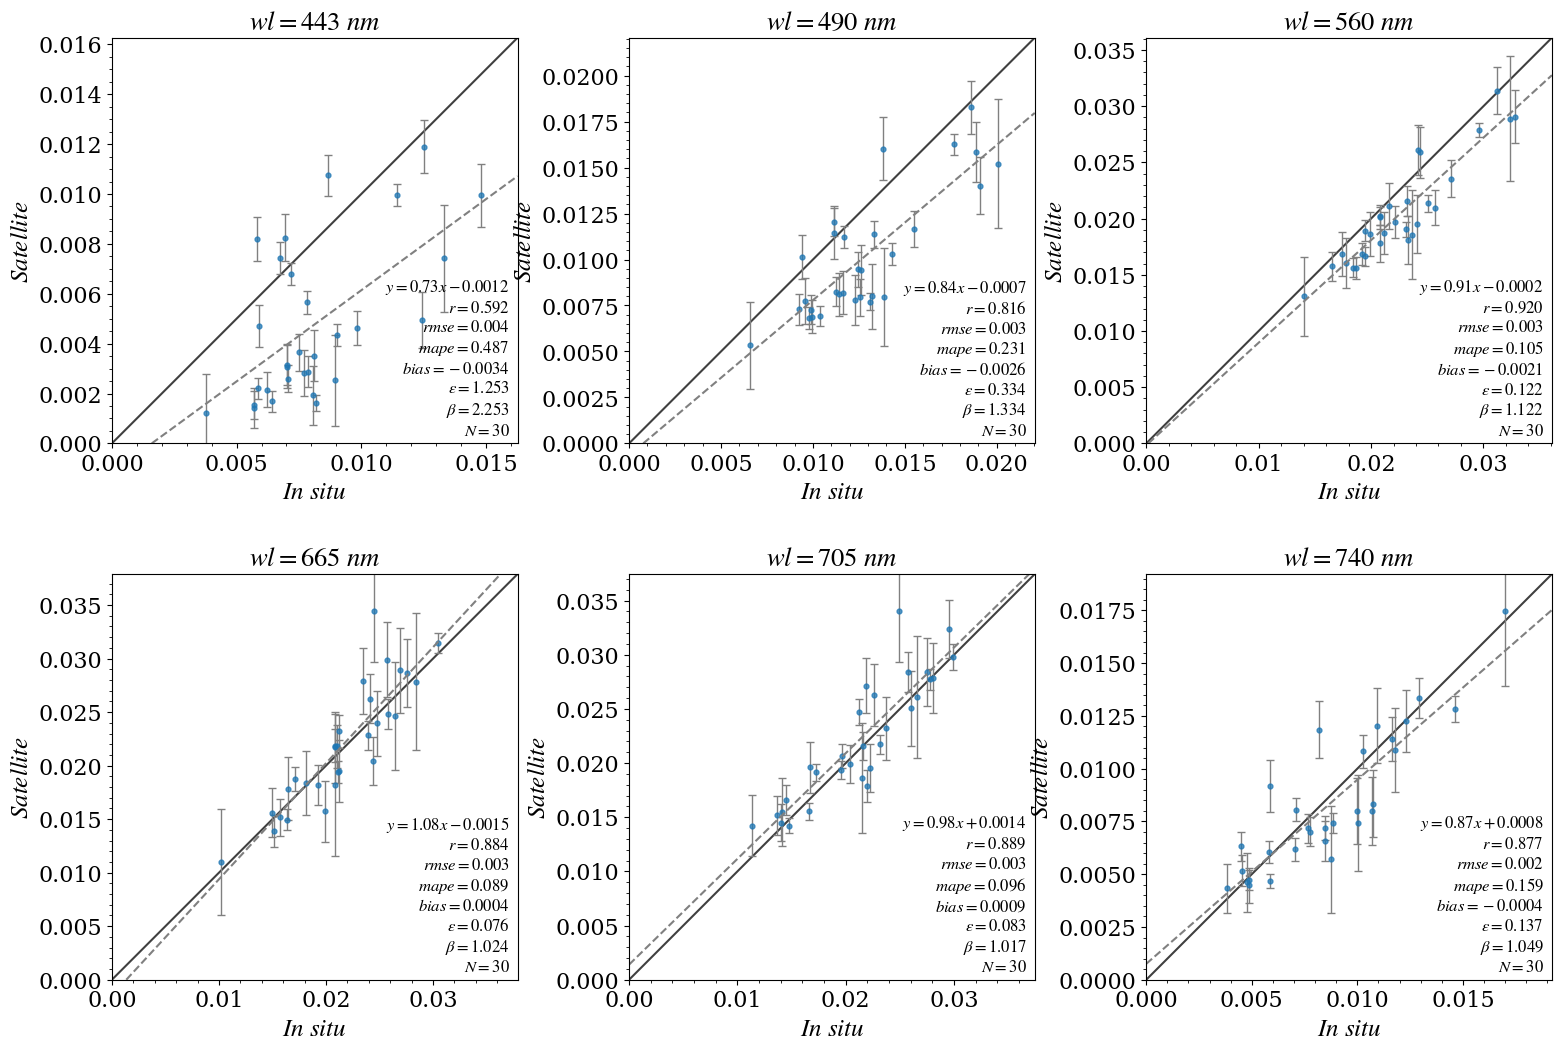

In [36]:
sat_var='median'
insitu_var= 'Rrs'
rows=2
cols=3
u = grstbx.utils
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*5+1, rows * 5+1.))  # ,sharey=True
fig.subplots_adjust(hspace=0.275, wspace=0.275,left=0.065, right=0.965,bottom=0.08, top=0.95)
axs=axs.ravel()
for ii, wl in enumerate(matchup_data.isel(wl=slice(0,6)).wl.values):
    ax=axs[ii]
    matchup_data_ = matchup_data.sel(wl=wl).dropna('time')
   
    x,y=matchup_data_[insitu_var].values.ravel(),matchup_data_[sat_var].values.ravel()
    
    all_values = [*x,*y]
    xmin,xmax=np.min([0,np.min(all_values)])*1.1,np.max(all_values)*1.1

  
    ax.plot(x,y,ls='',marker='o',ms=3.5,alpha=0.75,zorder=2)
    #im2 = matchup_.groupby('station').plot.scatter(x=insitu_var,y=sat_var,ax=ax)
    ax.errorbar(x,y,
    #            xerr=matchup[insitu_var.replace('mean','std')].values.ravel(),
                yerr=matchup_data_['Rrs_std'].values.ravel(),
                color='gray',fmt='none',lw=1, capsize=3,zorder=1)# ecolor=resdf.spm_norm, zorder=9)

    add_stats(x,y,ax,label=True)

    ax.set_xlim([xmin,xmax])
    ax.set_ylim([xmin,xmax])
    ax.minorticks_on()
    

    ax.set_title(r'$wl='+str(wl)+'\ nm$')
    ax.set_xlabel(r'$In\ situ\ $')
    ax.set_ylabel(r'$Satellite\ $')


for ax in axs.ravel():
    u.Plotting.set_layout(ax)

In [41]:
matchup_df_

median   Rrs_q25   Rrs_q75  Rrs_min  Rrs_max  Rrs_mean  \
wl  time                                                                  
443 2023-03-11  0.01190  0.011250  0.012270  0.00746  0.01284  0.011569   
    2023-03-13      NaN       NaN       NaN      NaN      NaN       NaN   
    2023-03-14  0.00861  0.004962  0.010610  0.00220  0.01126  0.007848   
    2023-03-24  0.00743  0.005190  0.008060 -0.00206  0.00916  0.006580   
    2023-03-26  0.00495  0.003880  0.005627  0.00084  0.00658  0.004682   
...                 ...       ...       ...      ...      ...       ...   
865 2024-01-20  0.00402  0.003450  0.004890  0.00205  0.00617  0.004131   
    2024-01-23  0.00627  0.005930  0.006640  0.00462  0.00884  0.006309   
    2024-01-25  0.00745  0.007120  0.007780  0.00554  0.00862  0.007440   
    2024-01-28  0.00648  0.005990  0.006970  0.00443  0.00897  0.006485   
    2024-01-30  0.00419  0.003290  0.004720  0.00126  0.00605  0.004067   

                 Rrs_std        sza    aot550  pix_num  rel_pix_num  \
wl  time                                                              
443 2023-03-11  0.001052  43.222053  0.280977   2601.0     1.000000   
    2023-03-13       NaN        NaN       NaN      NaN          NaN   
    2023-03-14  0.002715  42.474694  0.265150   2598.0     0.998847   
    2023-03-24  0.002145  45.269596  0.271336   2598.0     0.998847   
    2023-03-26  0.001136  47.236159  0.288000   2598.0     0.998847   
...                  ...        ...       ...      ...          ...   
865 2024-01-20  0.000855  32.187324  0.289751   2601.0     1.000000   
    2024-01-23  0.000573  30.817636  0.343475   2601.0     1.000000   
    2024-01-25  0.000448  33.114521  0.310290   2601.0     1.000000   
    2024-01-28  0.000671  31.787497  0.318542   2601.0     1.000000   
    2024-01-30  0.000834  34.056597  0.303000   2601.0     1.000000   

                spatial_ref  quantile       Rrs  
wl  time                                         
443 2023-03-11            0      0.25  0.012510  
    2023-03-13            0      0.25  0.007806  
    2023-03-14            0      0.25       NaN  
    2023-03-24            0      0.25  0.013315  
    2023-03-26            0      0.25  0.012451  
...                     ...       ...       ...  
865 2024-01-20            0      0.25  0.005294  
    2024-01-23            0      0.25  0.005737  
    2024-01-25            0      0.25  0.008480  
    2024-01-28            0      0.25  0.006287  
    2024-01-30            0      0.25  0.005605  

[387 rows x 14 columns]

<Axes: xlabel='$In\\ situ\\ R_{rs}\\ (sr^{-1})$', ylabel='$Satellite\\ R_{rs}\\ (sr^{-1})$'>

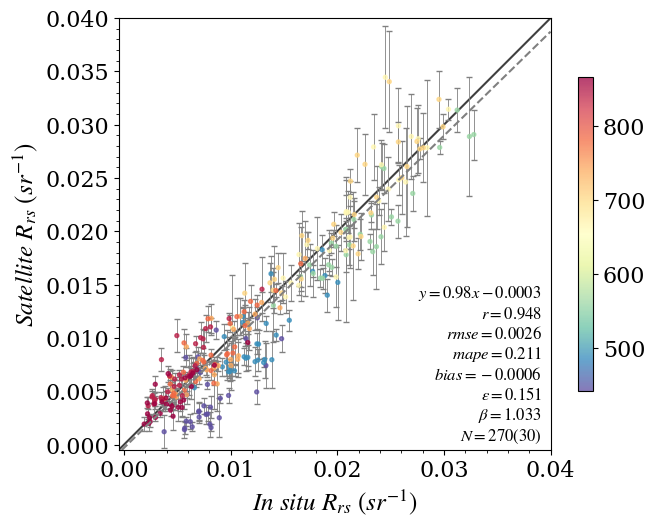

In [57]:
cmap = plt.cm.Spectral_r

norm = mpl.colors.Normalize(vmin=440, vmax=800)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

good_dates = matchup_data.Rrs.dropna('time').time
good_dates=matchup_data.sel(time=good_dates).Rrs_mean.dropna('time').time
matchup_df_=matchup_data.sel(time=good_dates).to_dataframe().reset_index('wl')

sat_var='median'
insitu_var= 'Rrs'
rows=1
cols=1
xmin,xmax=-0.0005,0.04
u = grstbx.utils
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*5+1, rows * 5+1.))  # ,sharey=True
fig.subplots_adjust(hspace=0.275, wspace=0.275,left=0.065, right=0.965,bottom=0.08, top=0.95)
#axs=axs.ravel()

ax=axs

#matchup_data_ = matchup_data.sel(wl=wl).dropna('time')

x,y,wl=matchup_df_[insitu_var].values,matchup_df_[sat_var].values,matchup_df_['wl'].values

all_values = [*x,*y]



g=ax.scatter(x,y,alpha=0.75,s=8,zorder=2,c=wl,cmap=cmap)
#im2 = matchup_.groupby('station').plot.scatter(x=insitu_var,y=sat_var,ax=ax)
ax.errorbar(x,y,
#            xerr=matchup[insitu_var.replace('mean','std')].values.ravel(),
            yerr=matchup_df_['Rrs_std'].values,
            color='gray',fmt='none',lw=0.6, capsize=2,zorder=1)# ecolor=resdf.spm_norm, zorder=9)

add_stats(x,y,ax,label=True,Nbands=9)

ax.set_xlim([xmin,xmax])
ax.set_ylim([xmin,xmax])
ax.minorticks_on()
cbar = fig.colorbar(g, shrink=0.6)

# ax.set_title(r'$wl='+str(wl)+'\ nm$')
ax.set_xlabel(r'$In\ situ\ R_{rs}\ (sr^{-1})$')
ax.set_ylabel(r'$Satellite\ R_{rs}\ (sr^{-1})$')

ax.set_xlim([xmin,xmax])
ax.set_ylim([xmin,xmax])


u.Plotting.set_layout(ax)


In [55]:
y

array([0.0119  ,      nan, 0.00743 , 0.00495 ,      nan,      nan,
            nan, 0.00994 ,      nan, 0.00744 , 0.00141 , 0.00462 ,
       0.00155 , 0.00122 , 0.00565 , 0.00253 , 0.00168 ,      nan,
       0.00435 , 0.00352 , 0.00284 , 0.00216 , 0.00308 , 0.00996 ,
       0.00288 , 0.01075 , 0.00678 , 0.00824 , 0.00818 , 0.0047  ,
       0.00221 , 0.00316 , 0.00259 , 0.00161 , 0.00365 , 0.00192 ,
       0.01828 ,      nan, 0.01522 , 0.01402 ,      nan,      nan,
            nan, 0.01586 ,      nan, 0.01203 , 0.00774 , 0.01167 ,
       0.0073  , 0.00534 , 0.01137 , 0.00797 , 0.00693 ,      nan,
       0.01028 , 0.00943 , 0.00779 , 0.00688 , 0.00811 , 0.01626 ,
       0.00794 , 0.01603 , 0.01125 , 0.01147 , 0.01014 , 0.00727 ,
       0.00684 , 0.00819 , 0.00825 , 0.00771 , 0.00946 , 0.00799 ,
       0.03137 ,      nan, 0.0289  , 0.02908 ,      nan,      nan,
            nan, 0.0259  ,      nan, 0.02015 , 0.01605 , 0.02356 ,
       0.01575 , 0.01307 , 0.02096 , 0.01857 , 0.01663 ,      

In [53]:
matchup_data.Rrs_mean.dropna('time').time

<xarray.DataArray 'time' (time: 37)> Size: 296B
array(['2023-03-11T00:00:00.000000000', '2023-03-14T00:00:00.000000000',
       '2023-03-24T00:00:00.000000000', '2023-03-26T00:00:00.000000000',
       '2023-03-31T00:00:00.000000000', '2023-06-02T00:00:00.000000000',
       '2023-06-12T00:00:00.000000000', '2023-06-14T00:00:00.000000000',
       '2023-07-07T00:00:00.000000000', '2023-07-14T00:00:00.000000000',
       '2023-07-17T00:00:00.000000000', '2023-08-01T00:00:00.000000000',
       '2023-08-11T00:00:00.000000000', '2023-08-13T00:00:00.000000000',
       '2023-08-26T00:00:00.000000000', '2023-10-02T00:00:00.000000000',
       '2023-10-07T00:00:00.000000000', '2023-10-10T00:00:00.000000000',
       '2023-10-12T00:00:00.000000000', '2023-10-15T00:00:00.000000000',
       '2023-10-17T00:00:00.000000000', '2023-10-25T00:00:00.000000000',
       '2023-10-27T00:00:00.000000000', '2023-11-04T00:00:00.000000000',
       '2023-11-09T00:00:00.000000000', '2023-11-11T00:00:00.000000000',
       '2023-11-14T00:00:00.000000000', '2023-11-16T00:00:00.000000000',
       '2023-11-19T00:00:00.000000000', '2023-11-24T00:00:00.000000000',
       '2024-01-08T00:00:00.000000000', '2024-01-15T00:00:00.000000000',
       '2024-01-20T00:00:00.000000000', '2024-01-23T00:00:00.000000000',
       '2024-01-25T00:00:00.000000000', '2024-01-28T00:00:00.000000000',
       '2024-01-30T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 296B 2023-03-11 2023-03-14 ... 2024-01-30
    spatial_ref  int64 8B 0
    quantile     float64 8B 0.25